In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.style.use('ggplot')
matplotlib.style.use('seaborn-notebook')
plt.rcParams['figure.figsize'] = (14.0, 11.0)

In [3]:
size_map = {
    'A': '46',
    'I': '48',
    'XS': '50',
    'S': '52',
    'M': '54',
    'L': '56',
    'XL': '58'
}
def size_to_int(x):
    r = size_map.get(x, None)
    x = np.int(r) if r else np.int(x)
    return x

def ravel_zero(x):
    return x if x != 0. else 1000423

In [5]:
data = pd.read_csv('data/orders_train.txt', sep=';')
# drop with quantity 0 as they have to have 0 returnQuantity -- to avoid wrong learning
data = data[data.quantity > 0]
# drop with returnQuantity > quantity
data = data[data.quantity >= data.returnQuantity]
# create explicit date objects
data['orderDate'] = pd.to_datetime(data['orderDate'])
# strings to integers
data['orderID'] = data['orderID'].apply(lambda x: x.replace('a', '')).astype(np.int)
data['articleID'] = data['articleID'].apply(lambda x: x.replace('i', '')).astype(np.int)
data['customerID'] = data['customerID'].apply(lambda x: x.replace('c', '')).astype(np.int)
data['voucherID'] = data['voucherID'].apply(lambda x: str(x).replace('v', '')).astype(np.float)
# remove nan in productGroup with 0 (zero was unused indeed) -- USE IMPUTATION OR LEARNING RATHER
data['productGroup'] = np.nan_to_num(data['productGroup']).astype(np.int)
# normalize size codes
data['sizeCodeNum'] = data.sizeCode.copy().apply(size_to_int)
# fit voucherID 0 and Nan to default range (set to 1000423 for gaussian like)
data['voucherIDNorm'] = data.voucherID.copy().apply(np.nan_to_num).apply(ravel_zero)
# aggregate price per product
data['pricePerProduct'] = (data.price / data.quantity).apply(np.nan_to_num)
# list savings
data['savedPerProduct'] = (data.rrp - data.pricePerProduct)

In [6]:
data

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity,sizeCodeNum,voucherIDNorm,pricePerProduct,savedPerProduct
0,1000001,2014-01-01,1000382,1972,44,3,1,10.00,29.99,0,0,1010575,2,BPRG,0,44,1000423,10.00,19.99
1,1000001,2014-01-01,1000550,3854,44,3,1,20.00,39.99,0,0,1010575,2,BPRG,0,44,1000423,20.00,19.99
2,1000002,2014-01-01,1001991,2974,38,8,1,35.00,49.99,0,0,1045905,4,BPRG,0,38,1000423,35.00,14.99
3,1000002,2014-01-01,1001999,1992,38,8,1,49.99,49.99,0,0,1045905,4,BPRG,1,38,1000423,49.99,0.00
4,1000003,2014-01-01,1001942,1968,42,8,1,10.00,35.99,0,0,1089295,2,PAYPALVC,0,42,1000423,10.00,25.99
5,1000003,2014-01-01,1001942,1972,42,8,1,10.00,35.99,0,0,1089295,2,PAYPALVC,0,42,1000423,10.00,25.99
6,1000003,2014-01-01,1001974,1001,42,8,1,25.00,39.99,0,0,1089295,2,PAYPALVC,0,42,1000423,25.00,14.99
7,1000003,2014-01-01,1001976,3976,44,8,1,15.00,39.99,0,0,1089295,2,PAYPALVC,0,44,1000423,15.00,24.99
9,1000004,2014-01-01,1002457,1001,42,14,1,89.99,89.99,0,0,1050116,3,BPRG,1,42,1000423,89.99,0.00
10,1000005,2014-01-01,1000366,1968,42,3,1,15.00,39.99,0,0,1089296,2,BPRG,1,42,1000423,15.00,24.99


In [96]:
data['pricePerProduct'] = data.price / data.quantity

In [8]:
data[data.returnQuantity > data.quantity]

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity,sizeCodeNum,voucherIDNorm,pricePerProduct,savedPerProduct


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff270456c18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff26a7f7cf8>]], dtype=object)

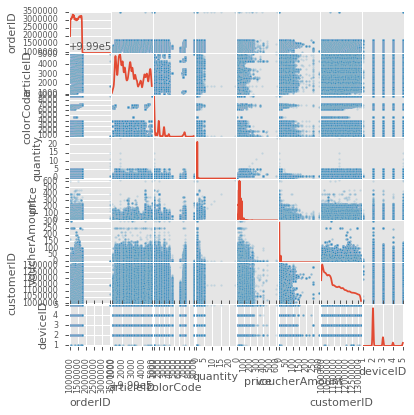

In [27]:
sub_data = data[['orderID', 'articleID', 'colorCode', 'sizeCode', 'quantity', 'price', 'voucherAmount', 'customerID', 'deviceID']]
pd.tools.plotting.scatter_matrix(sub_data, alpha=0.2, figsize=(6, 6), diagonal='kde')